In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed, uniform
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 

In [5]:
# Set a random seed for reproducibility
seed(0)

# Define the parameters for the Gaussian distributions
# customize these parameters to create desired modes
mode1_mean = 30
mode1_stddev = 5
mode1_weight = 0.4

mode2_mean = 70
mode2_stddev = 10
mode2_weight = 1.2

mode3_mean = 120
mode3_stddev = 16
mode3_weight = 0.7

# Generate random numbers from the mixture of Gaussian distributions
# number of samples for each mode: 100,000,000
num_samples = 100000000
mode1_samples = np.random.normal(mode1_mean, mode1_stddev, int(num_samples * mode1_weight))
mode2_samples = np.random.normal(mode2_mean, mode2_stddev, int(num_samples * mode2_weight))
mode3_samples = np.random.normal(mode3_mean, mode3_stddev, int(num_samples * mode3_weight))

# Combine the samples from three modes 
# number of sample for the combined data: 230,000,000
multimodal_data = np.concatenate((mode1_samples, mode2_samples, mode3_samples))

In [6]:
# Calculate population mean for multimodal data
multimodal_data.mean(), multimodal_data.min(), multimodal_data.max()

(78.26176699419089, 1.5817807428810715, 206.28236650142702)

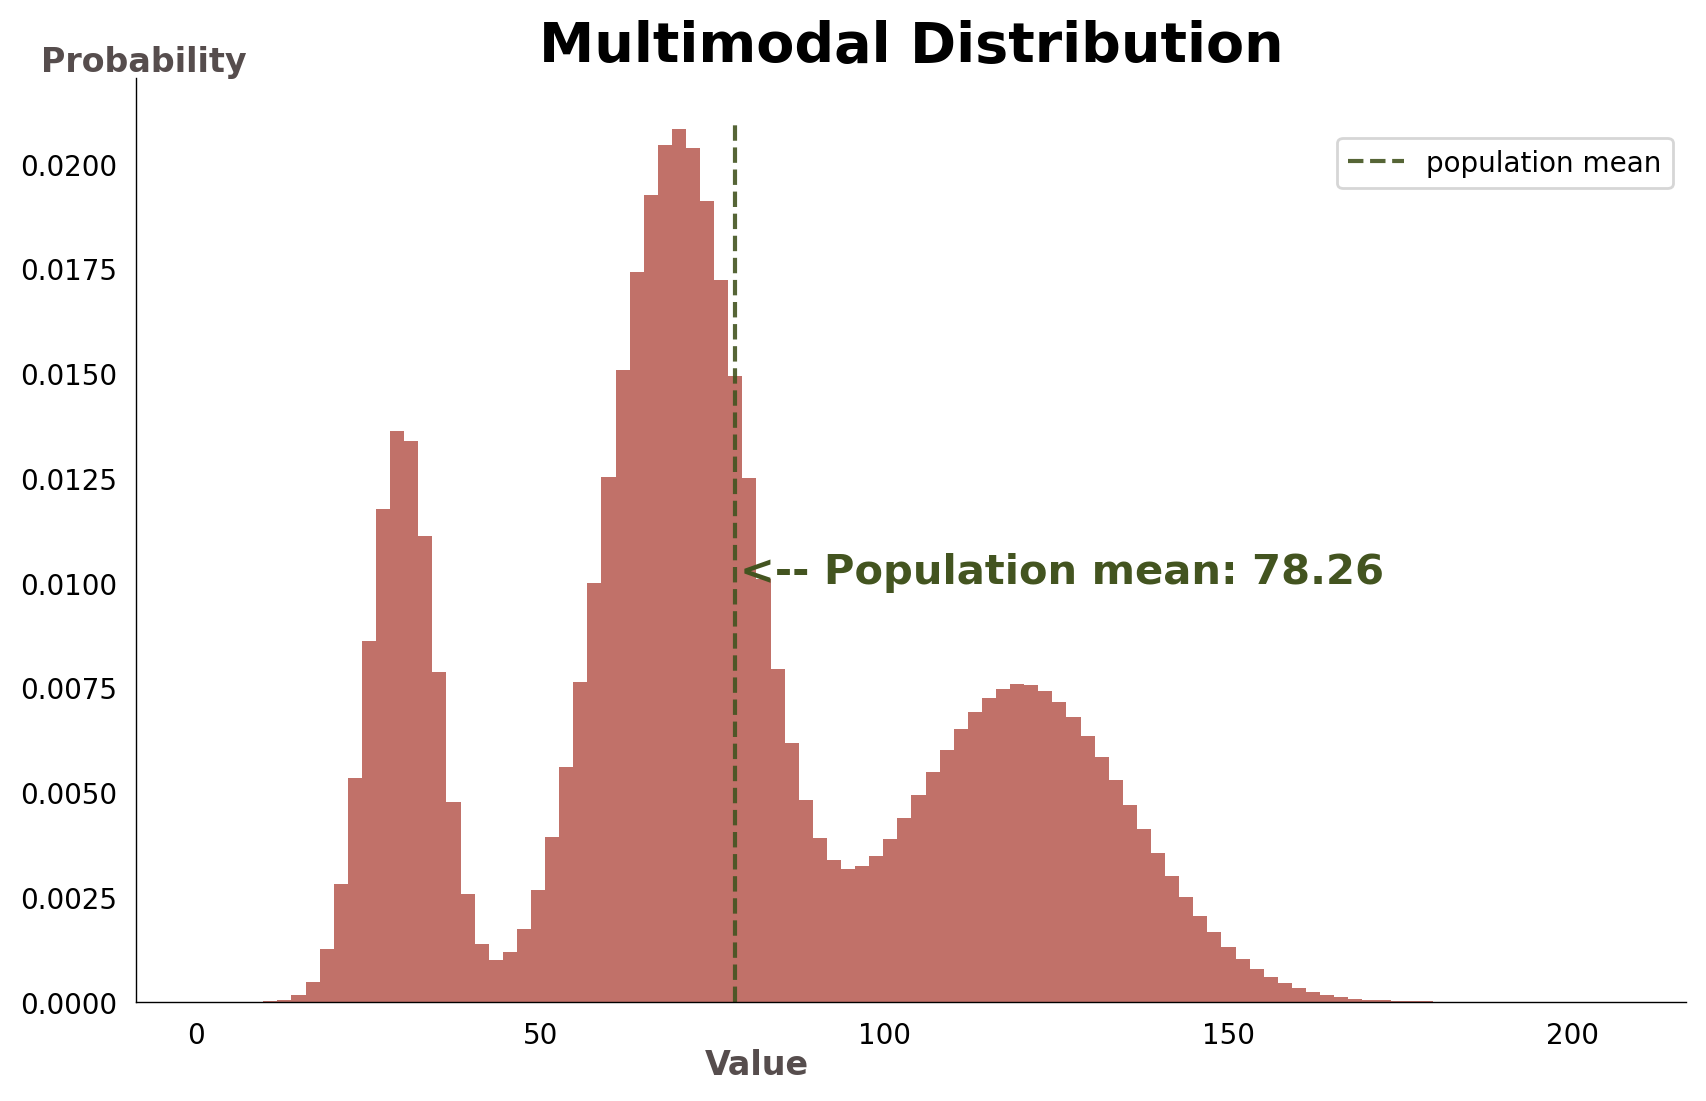

In [7]:
# Multimodal Distribution histogram 
fig, ax = plt.subplots(figsize=(10,6))  
ax.hist(multimodal_data, bins=100, density=True, alpha=0.6, color='#991305')
ax.set_xlabel('Value',fontsize=12, weight="bold", c="#564d4d")
ax.set_ylabel('Probability',fontsize=12, weight="bold", c="#564d4d", rotation="horizontal")
ax.xaxis.set_label_coords(0.40, -0.05)
ax.yaxis.set_label_coords(0.005, 1.0)
ax.set_title('Multimodal Distribution',c="#000000",fontsize=20, weight="bold")
ax.vlines(x=78.26,ymin=0,ymax=0.021,color="#435420",linewidth=1.5,alpha=0.9, linestyle="dashed", label="population mean")
ax.tick_params(left=False, right=False, bottom=False)
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="upper right",bbox_to_anchor=(1.2, 0.95))
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="upper right",bbox_to_anchor=(1.0, 0.95),)
ax.text(s="<-- Population mean: 78.26", color="#435420", fontsize=15, weight="bold",x=79, y=0.01)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [86]:
# Functions to help make the sampling distribution plots

def get_random_sample_mean(data, sample_size):
    random_sample = np.random.choice(data, sample_size)
    sample_mean = np.mean(random_sample)
    return sample_mean


def make_subplot(ax, sample_means, sample_size, pop_mean, max_y_value):    
    ax.hist(sample_means, bins=50, density=True, alpha=0.6, color='#991305')
    ax.set_title(f' Sampling Distribution (n={sample_size})', c="#000000", fontsize=12, weight="bold")
    ax.vlines(x=pop_mean, ymin=0, ymax=max_y_value, color="#435420", linewidth=1.5, linestyle="dashed", alpha=.6)
    
    ax.text(s= r"<-- $\mu_{\bar{x}}$ ", color="#435420", fontsize=16, x=79, y=0.02)
    ax.text(s= f"= {round(np.mean(sample_means),2)}", color="#435420", weight="bold", fontsize=12, x=104, y=0.02)

    ax.spines["left"].set_linewidth(0.5)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

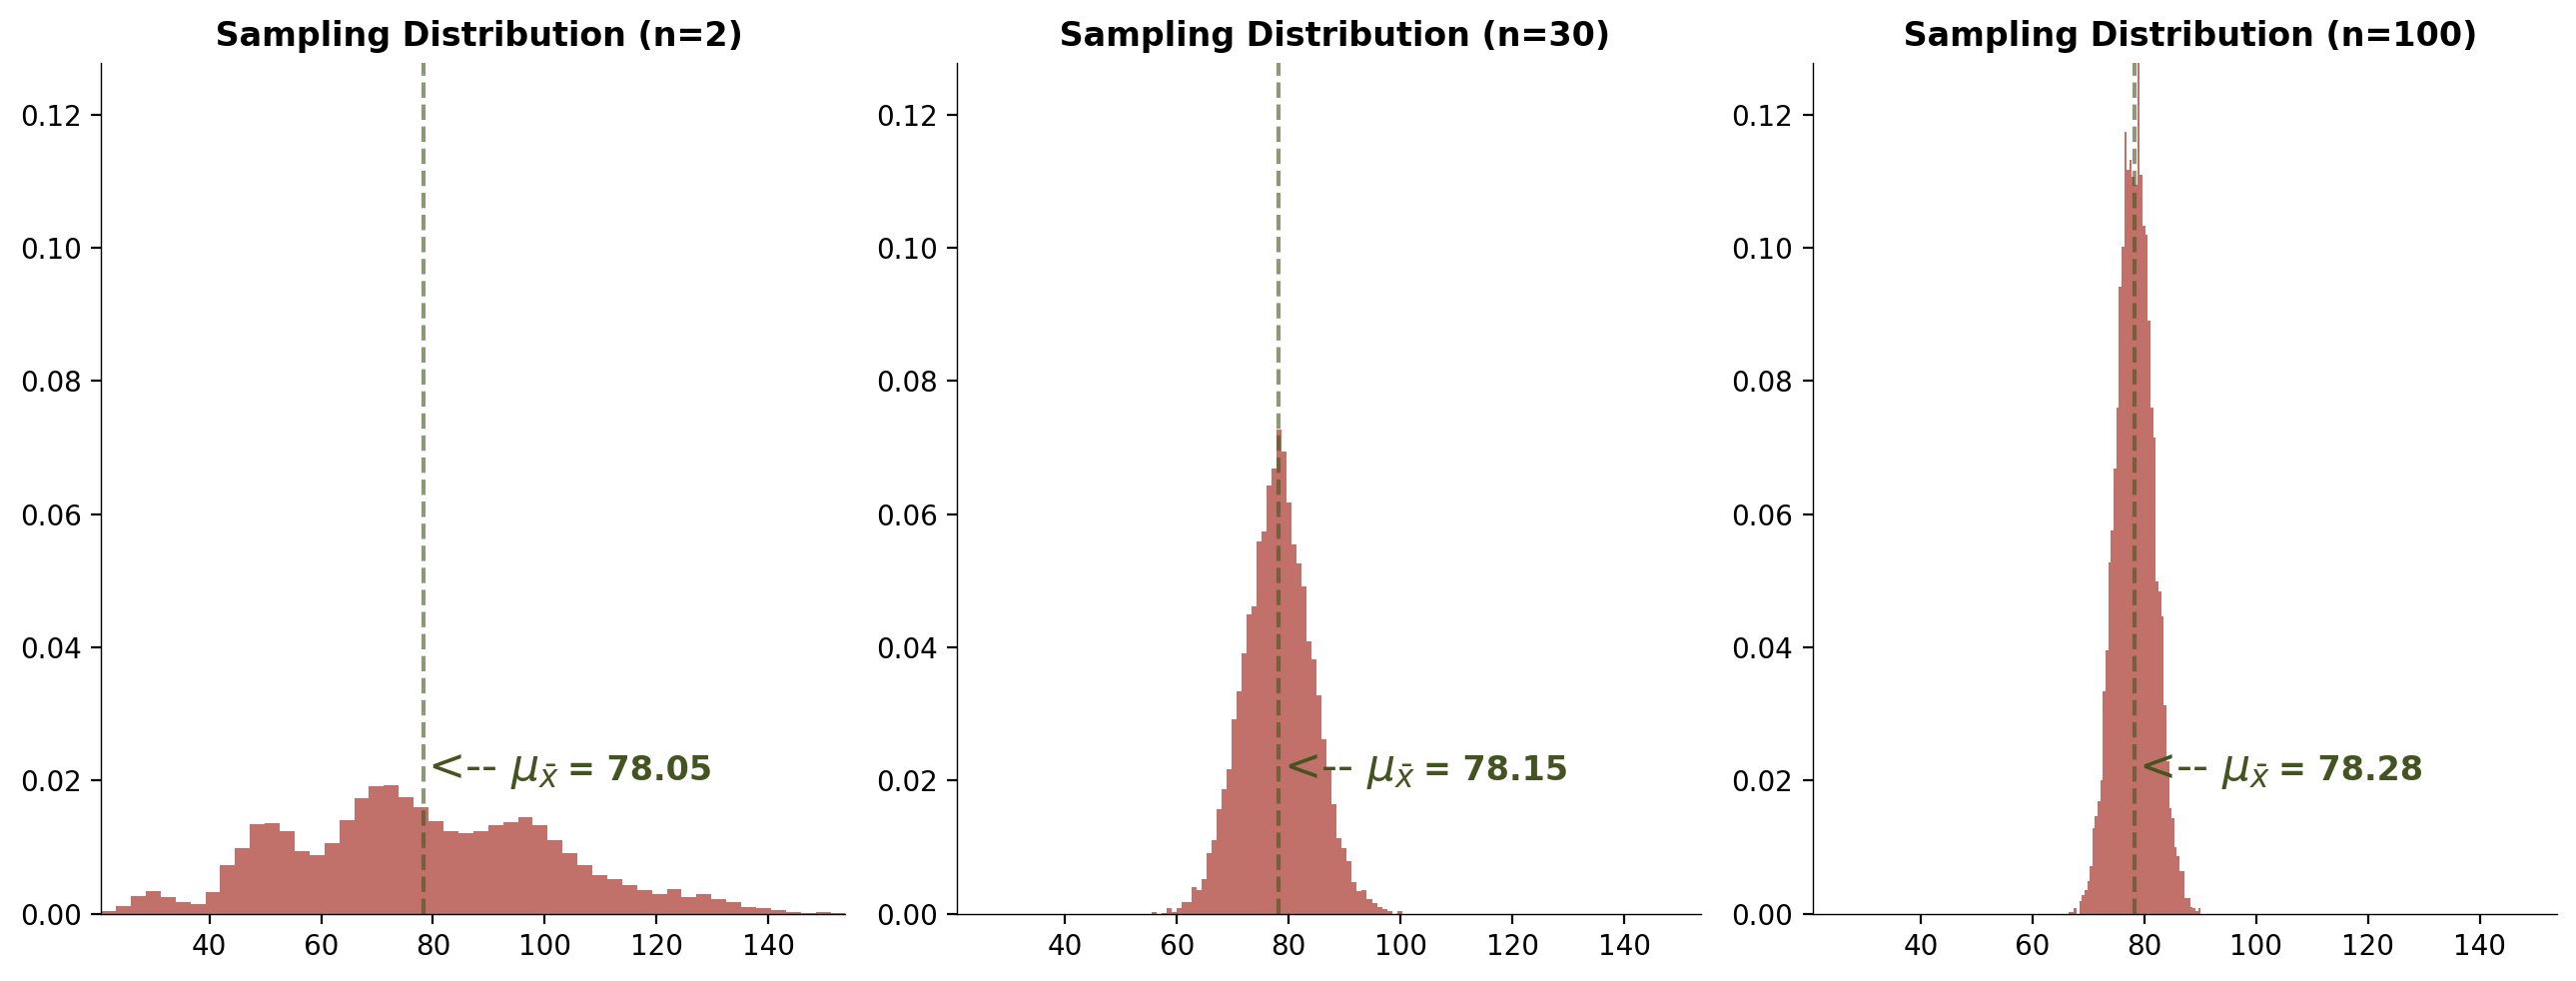

In [87]:
num_random_samples = 10000  # Amount of random samples taken (hint: not size)

sample_sizes = [2, 30, 100]  # Desired sample sizes

pop_mean = np.mean(multimodal_data)

# Get samples & means for each of the sizes
sample_means_list = []
for size in sample_sizes:
    means = [get_random_sample_mean(multimodal_data, size) for _ in range(num_random_samples)]
    sample_means_list.append(means)

fig, axs = plt.subplots(1, 3, figsize=(13, 5))

max_y = max(max(np.histogram(means, bins=50, density=True)[0]) for means in sample_means_list)
min_x = min(np.min(means) for means in sample_means_list)
max_x = max(np.max(means) for means in sample_means_list)

for ax, sample_means, size in zip(axs, sample_means_list, sample_sizes):
    make_subplot(ax, sample_means, size, pop_mean, max_y)


for ax in axs:
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

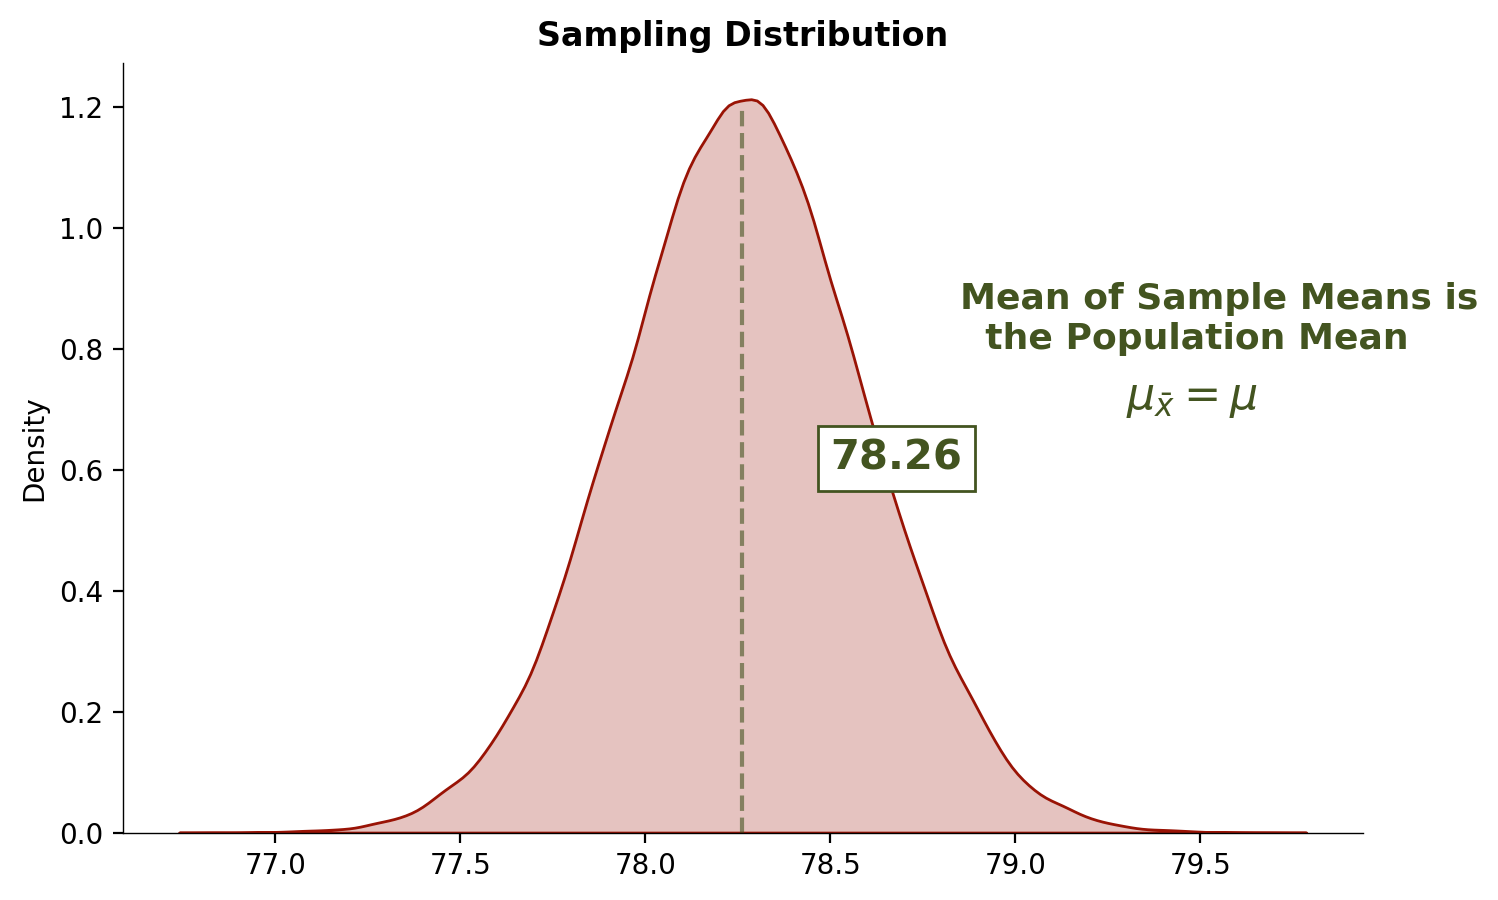

In [140]:
# Smooth version of sampling distribution with large sample size to show sample mean ~ Normal.
# Mean of sample means is the population mean

pop_mean = np.mean(multimodal_data)

means = [get_random_sample_mean(multimodal_data, 10000) for _ in range(100000)]
mean_of_means = np.mean(means)

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(means, density=True, alpha=0.6, color='white')

sns.kdeplot(means, color='#991305', fill='#991305')


ax.set_title('Sampling Distribution', c="#000000", fontsize=12, weight="bold")
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.vlines(x=pop_mean, ymin=0, ymax=1.195, color="#435420", linewidth=1.5, linestyle="dashed", alpha=.6)
bbox_props = dict(boxstyle="square, pad=0.3", edgecolor="#435420", facecolor="none")

ax.text(s= r"$\mu_{\bar{x}} = \mu$", color="#435420", fontsize=16, x=79.3, y=0.7)
ax.text(s='Mean of Sample Means is\n  the Population Mean', y=.8,x=78.85,color="#435420", fontsize=13, weight="bold")
ax.text(s=f'{round(np.mean(means),2)}', x=78.5, y=.6, color="#435420", fontsize=15, weight="bold", bbox=dict(boxstyle="square, pad=0.3", edgecolor="#435420", facecolor="white"))
plt.show()